========== 데이터 확인 ==========
카테고리 개수 : 46
학습용 뉴스 기사 개수 : 8982
테스트용 뉴스 기사 개수 : 2246

 ========== 딥러닝 시작 ==========
Epoch 1/20
90/90 [==============================] - 17s 155ms/step - loss: 2.5634 - acc: 0.3657 - val_loss: 2.1718 - val_acc: 0.4862
Epoch 2/20
90/90 [==============================] - 13s 149ms/step - loss: 2.0450 - acc: 0.4930 - val_loss: 1.9885 - val_acc: 0.5142
Epoch 3/20
90/90 [==============================] - 13s 144ms/step - loss: 1.9348 - acc: 0.5148 - val_loss: 1.8647 - val_acc: 0.5356
Epoch 4/20
90/90 [==============================] - 13s 147ms/step - loss: 1.7168 - acc: 0.5630 - val_loss: 1.6986 - val_acc: 0.5579
Epoch 5/20
90/90 [==============================] - 13s 144ms/step - loss: 1.6669 - acc: 0.5705 - val_loss: 1.6624 - val_acc: 0.5815
Epoch 6/20
90/90 [==============================] - 13s 145ms/step - loss: 1.5843 - acc: 0.6019 - val_loss: 1.6179 - val_acc: 0.5944
Epoch 7/20
90/90 [==============================] - 13s 145ms/step - loss: 1.5454 - acc:

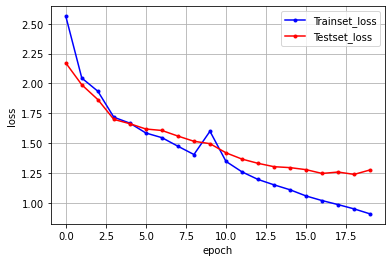

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.utils as np_utils
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

import warnings
warnings.filterwarnings('ignore')

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# 빈도수 1000위 안에 해당하는 단어만 호출
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인
category = np.max(y_train) + 1
print('='*10,'데이터 확인', '='*10)
print('카테고리 개수 :', category)
print('학습용 뉴스 기사 개수 :', len(X_train))
print('테스트용 뉴스 기사 개수 :', len(X_test))

# 단어 수가 100보다 클 경우 100개째 단어만 선택하고 나머지는 제외, 100개 단어에 모자를 경우 모자른 부분을 모두 0으로 대체
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# y 데이터 원-핫 인코딩 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


# Embedding : 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환 역할, 모델 설정 맨 처음에 위치
# Embedding(불러온 단어의 총 개수, 기사당 단어 수)
# LSTM : 한층 안에서 반복을 많은 RNN의 단점인 일반 신경망보다 기울기소실 문제가 더 많이 발생하는점을 보완, RNN에서 기억 값에 대한 가중치 제어
# LSTM(기사당 단어 수, 기타 옵션)
print('\n', '='*10,'딥러닝 시작', '='*10)

model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

hist = model.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test, y_test))

print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()